## Exercicio 9 
Ana Moreira \
Damião Goes

In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler

#### Seleção das variáveis quantitativas, dos sites Douro e Tejo


In [28]:

df = pd.read_csv(r'C:\Users\Damião\Desktop\Isa\Mestrado\2_semestre\Avdcaa\greends-avcad-2024\greends-avcad-2024\examples\EFIplus_medit.zip', compression='zip', sep=";")

In [35]:
df = df.dropna()


In [42]:
variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
data_sites = df[df['Catchment_name'].isin(['Douro', 'Tejo'])]
data_numeric = data_sites[variables].dropna()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)



#### Agglomerative clustering

In [ ]:
# Perform agglomerative clustering using different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
for method in linkage_methods:
    clustering = AgglomerativeClustering(n_clusters=2, linkage=method)
    data_sites['Cluster_' + method] = clustering.fit_predict(data_scaled)

# Visualize the clustering results for each linkage method
for method in linkage_methods:
    plt.figure(figsize=(8, 6))
    plt.scatter(data_sites['Longitude'], data_sites['Latitude'], c=data_sites['Cluster_' + method], cmap='viridis', s=50)
    plt.title('Agglomerative Clustering with ' + method.capitalize() + ' Linkage')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.show()

#### Heatmap with Dendrogram for Sites 

<Figure size 1000x800 with 0 Axes>

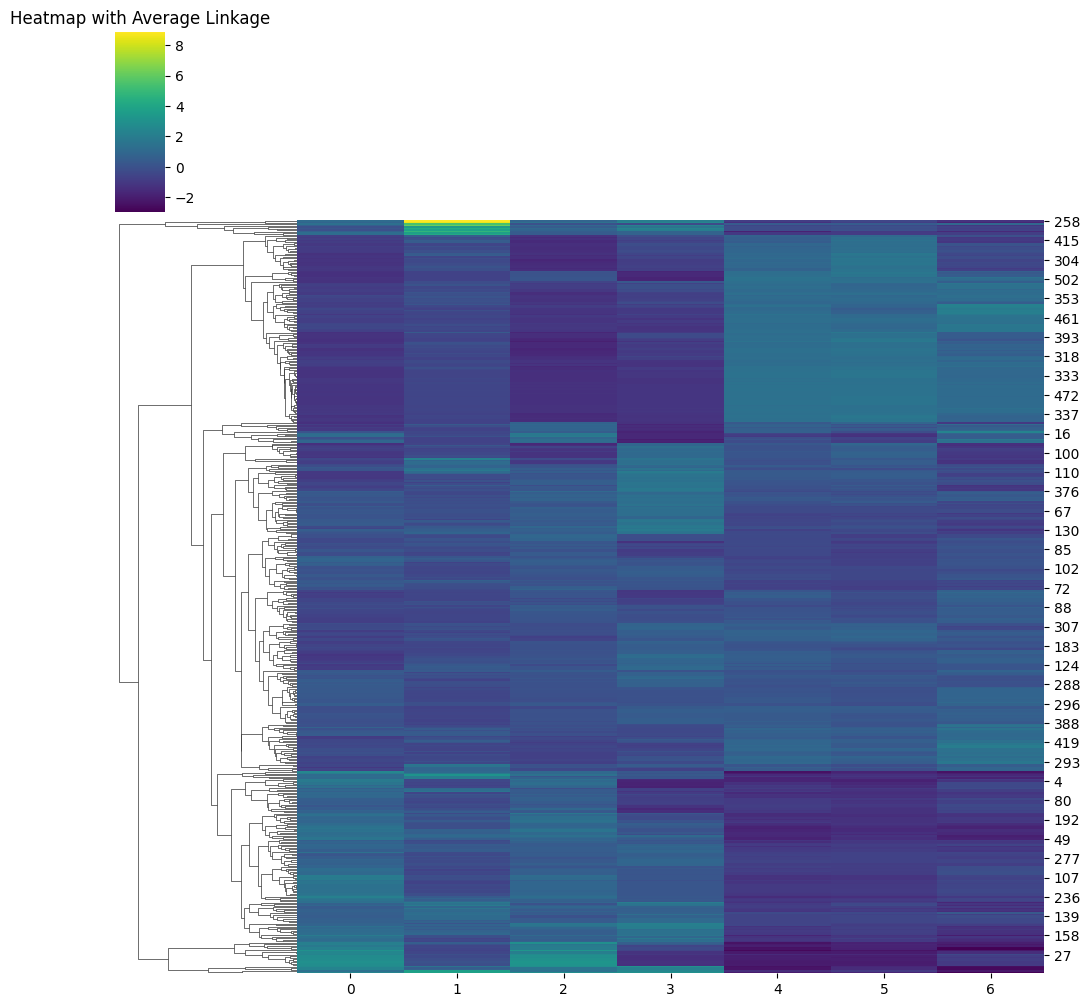

In [48]:
plt.figure(figsize=(10, 8))
sns.clustermap(data_scaled, method='average', cmap='viridis', row_cluster=True, col_cluster=False)
plt.title("Heatmap with Average Linkage")
plt.show()

#### Dendrogram for Environmental Variables

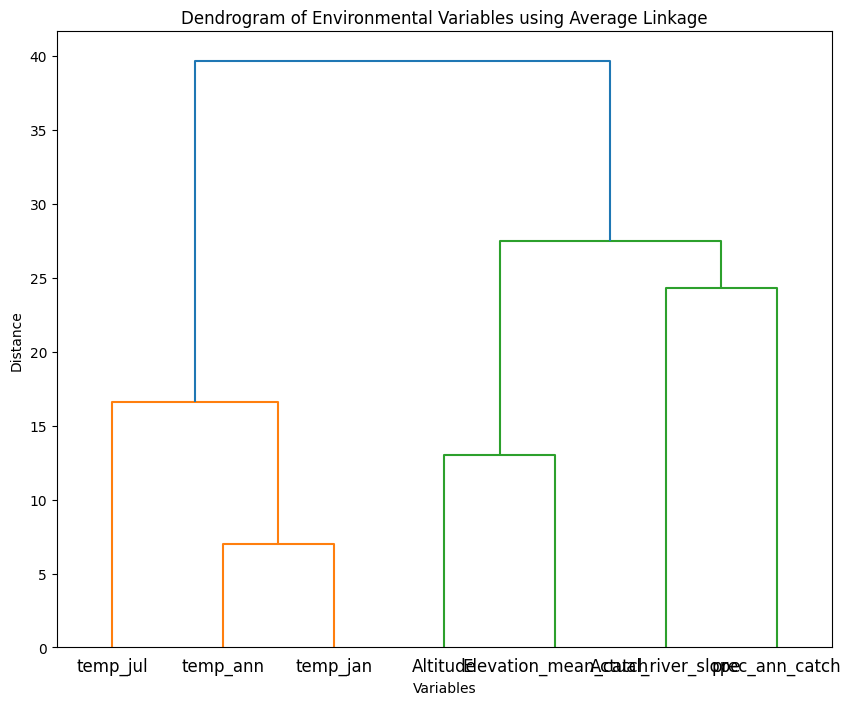

In [45]:
plt.figure(figsize=(10, 8))
Z = linkage(data_scaled.T, method='average')
dendrogram(Z, labels=variables)
plt.title("Dendrogram of Environmental Variables using Average Linkage")
plt.xlabel('Variables')
plt.ylabel('Distance')
plt.show()